# Implementasi CNN pada Genus Panthera

Outline dari notebook ini dijabarkan sebagai berikut:

1. **Pendahuluan**  
  
2. **Data pre-processing**  
     2.1. Memuat Data  
     2.2. Pickle
     
     2.3. Memeriksa Bentuk dan Tipe Data  
     2.4. Visualisasi gambar
     
     2.5. Visualisasi gambar ke 1 - 10  
     2.6. Image data generator  untuk augmentasi    
     2.7. Membagi data training dan valdiation
     
     2.8. Memeriksa data hasil augmentasi
     
     2.9. One Hot Encoding
      
3. **Convolutional Neural Network**  
    3.1. Membangun Arsitektur CNN dengan Keras  
    3.2. Konfigurasi Kompilasi Optimizer Model CNN  
    3.3. Fitting Model CNN  

4. **Analisis Hasil**  
    4.1. Melakukan Visualisasi / Plotting Loss dan Accuracy  
    4.2. Melakukan Visualisasi / Plotting Confusion Matrix  
    4.3. Laporan Klasifikasi  
    4.4. Melakukan Visualisasi / Plotting Error  
  
5. **Prediksi Data Test dan Penyimpanan**  
    5.1. Prediksi Data  
    5.2. Menyimpan Hasil Prediksi dan Model CNN  

# 1. Pendahuluan

Genus panthera terdiri dari 4 class yaitu : Harimau, Jaguar, Macan tutul,Singa.

Memiliki ukuran 128 x 128 x 3.


# 2. Data Pre-processing

In [0]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)


1.14.0


## 2.1 Memuat Data

Kita akan menggunakan data yang sudah diubah menjadi .Pickle yang berada di google drive. Pertama Mount google drive.

In [0]:
# Untuk mount google drive.
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## 2.2. Pickle
Data yang digunakan sudah dibuat terlebih dahulu kedalam file berformat .Pickle.
Pickle digunakan untuk serialisasi dan de-serialisasi struktur objek Python. Objek apa pun dengan Python dapat menjadi Pickle sehingga dapat disimpan di disk. Apa yang dilakukan pickle adalah bahwa ia “membuat serialisasi” objek terlebih dahulu sebelum menuliskannya ke file. Pengawetan adalah cara untuk mengubah objek python (daftar, dict, dll.) Menjadi aliran karakter. Idenya adalah bahwa aliran karakter ini berisi semua informasi yang diperlukan untuk merekonstruksi objek dalam skrip python lain.



In [0]:
#Memuat data 
import pickle

pickle_in = open("drive/My Drive/Skripsi/select/X_raw.pickle","rb")
X_load_raw = pickle.load(pickle_in)

pickle_in = open("drive/My Drive/Skripsi/select/y_raw.pickle","rb")
y_load_raw = pickle.load(pickle_in)

## 2.3. Memeriksa tipe data train dan label

In [0]:
# memeriksa tipe data
print('Tipe data variable train :', type(X_load_raw))
print('Tipe data variable label  :', type(y_load_raw))

Tipe data variable train : <class 'numpy.ndarray'>
Tipe data variable label  : <class 'list'>


In [0]:
import numpy as np

# memeriksa bentuk data
print('Shape dari variable train : ', X_load_raw.shape)
print('Shape dari variable label  : ', np.array(y_load_raw).shape)

# memeriksa jumlah data
num_train = len(X_load_raw) 
num_label = len(y_load_raw) 
print('Jumlah training data : ', num_train, 'Gambar')
print('Jumlah label data     : ', num_label, 'Label')

Shape dari variable train :  (2493, 128, 128, 3)
Shape dari variable label  :  (2493,)
Jumlah training data :  2493 Gambar
Jumlah label data     :  2493 Label


## 2.4. Visualisasi gambar

gambar yang digunakan berwarna

Gambar ke = 106


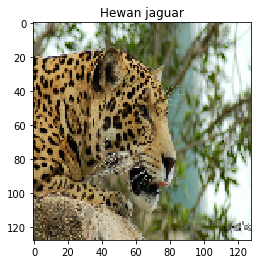

In [0]:
dim = 128

from random import randrange
import cv2

i = randrange(200)

print("Gambar ke = " + str(i)) 

CATEGORIES = {0:'harimau', 1:'jaguar', 2:'macan tutul', 3:'singa'}

# kita membutuhkan beberapa class dari library matplotlib untuk melakukan visualisasi
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# izinkan matplotlib menggambar pada jupyter notebook
%matplotlib inline

# konversi train dataset menjadi berformat (num_images, img_rows, img_cols) agar kita bisa plot mereka
xtrain_vis = X_load_raw

#tunjukkan gambar menggunakan pyplot
plt.imshow(cv2.cvtColor(xtrain_vis[i], cv2.COLOR_BGR2RGB)) #Menampilkan gambar
plt.title("Hewan %s" % (CATEGORIES[y_load_raw[i]]))         #tulis judul gambarnya
plt.show()                                              #tampilkan


## 2.5. Menampilkan gambar ke 1 - 10

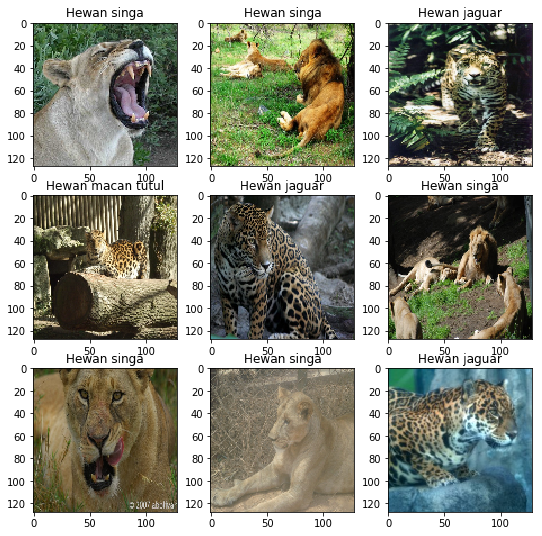

In [0]:
plt.figure(figsize=(9, 9))

for x in range(0, 9):
  plt.subplot(330+1+x)
  plt.imshow(cv2.cvtColor(xtrain_vis[x], cv2.COLOR_RGB2BGR))
  plt.title("Hewan %s" % (CATEGORIES[y_load_raw[x]]))         #tulis judul gambarnya
plt.show()

## 2.6 Image Data Generator
bahan bacaan : https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

In [0]:
# mengubah tipe data menjadi float
X_load_float = X_load_raw.astype('float32')
print(X_load_float[0])

[[[ 60.  96.  55.]
  [112. 140. 102.]
  [ 58.  90.  53.]
  ...
  [122. 153. 114.]
  [ 86. 112.  76.]
  [103. 129.  93.]]

 [[ 87. 115.  80.]
  [ 71. 105.  69.]
  [ 57.  97.  59.]
  ...
  [117. 148. 115.]
  [ 77. 101.  69.]
  [ 81. 105.  73.]]

 [[ 96. 122.  86.]
  [ 69. 109.  70.]
  [ 52.  96.  57.]
  ...
  [104. 125. 101.]
  [115. 138. 111.]
  [ 79. 102.  74.]]

 ...

 [[148. 155. 157.]
  [136. 143. 146.]
  [124. 131. 134.]
  ...
  [104. 105. 103.]
  [ 83.  84.  82.]
  [ 94.  95.  92.]]

 [[133. 140. 143.]
  [144. 151. 153.]
  [149. 156. 159.]
  ...
  [148. 149. 147.]
  [100. 100.  99.]
  [ 86.  86.  85.]]

 [[154. 161. 164.]
  [157. 164. 167.]
  [135. 142. 145.]
  ...
  [ 95.  93.  93.]
  [ 94.  94.  94.]
  [106. 106. 106.]]]


https://stackoverflow.com/questions/20486700/why-we-always-divide-rgb-values-by-255

RGB (Merah, Hijau, Biru) masing-masing 8 bit.
Rentang untuk masing-masing warna adalah 0-255 (2 ^ 8 = 256 kemungkinan).
Kisaran kombinasi adalah 256 * 256 * 256.

Dengan membaginya dengan 255, kisaran 0-255 dapat digambarkan dengan kisaran 0,0-1,0 di mana 0,0 berarti 0 (0x00) dan 1,0 berarti 255 (0xFF).

In [0]:
# Proses Normalisasi 
# Jalankan 1x
X_load_float = X_load_float/255

In [0]:
print(X_load_float[0])

[[[0.23529412 0.3764706  0.21568628]
  [0.4392157  0.54901963 0.4       ]
  [0.22745098 0.3529412  0.20784314]
  ...
  [0.47843137 0.6        0.44705883]
  [0.3372549  0.4392157  0.29803923]
  [0.40392157 0.5058824  0.3647059 ]]

 [[0.34117648 0.4509804  0.3137255 ]
  [0.2784314  0.4117647  0.27058825]
  [0.22352941 0.38039216 0.23137255]
  ...
  [0.45882353 0.5803922  0.4509804 ]
  [0.3019608  0.39607844 0.27058825]
  [0.31764707 0.4117647  0.28627452]]

 [[0.3764706  0.47843137 0.3372549 ]
  [0.27058825 0.42745098 0.27450982]
  [0.20392157 0.3764706  0.22352941]
  ...
  [0.40784314 0.49019608 0.39607844]
  [0.4509804  0.5411765  0.43529412]
  [0.30980393 0.4        0.2901961 ]]

 ...

 [[0.5803922  0.60784316 0.6156863 ]
  [0.53333336 0.56078434 0.57254905]
  [0.4862745  0.5137255  0.5254902 ]
  ...
  [0.40784314 0.4117647  0.40392157]
  [0.3254902  0.32941177 0.32156864]
  [0.36862746 0.37254903 0.36078432]]

 [[0.52156866 0.54901963 0.56078434]
  [0.5647059  0.5921569  0.6       ]


https://medium.com/@ksusorokina/image-classification-with-convolutional-neural-networks-496815db12a8

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,         # rotasi 30 derajat
    zoom_range = 0.2,          # Random zooming
    width_shift_range=0.2, 
    height_shift_range=0.2,
    horizontal_flip=True,      # membalik gambar horizontal
    fill_mode='nearest')       # metode pengisian piksel yang baru terbentuk “constant”, “reflect”, “wrap” or “nearest”



## 2.7. Membagi data Training dan Validation

Membagi data untuk train dan validation
Jalankan 1x




In [0]:
import numpy as np

# Melakukan pembagian secara otomatis
from sklearn.model_selection import train_test_split

seed = 2
np.random.seed(seed)

X_train, X_val, y_train, y_val = train_test_split(X_load_float, y_load_raw,  #input X_load_float dan y_load_raw , X_load_float sudah dibagi 255
                                                  test_size=0.2, #presentase porsi untuk X_val dan y_val
                                                  random_state=seed, #gunakan class random kita agar train_test_split dapat secara random melakukan pemisahan X_val dan y_val
                                                  shuffle = True) #shuffle data sebelum melakukan pemisahan


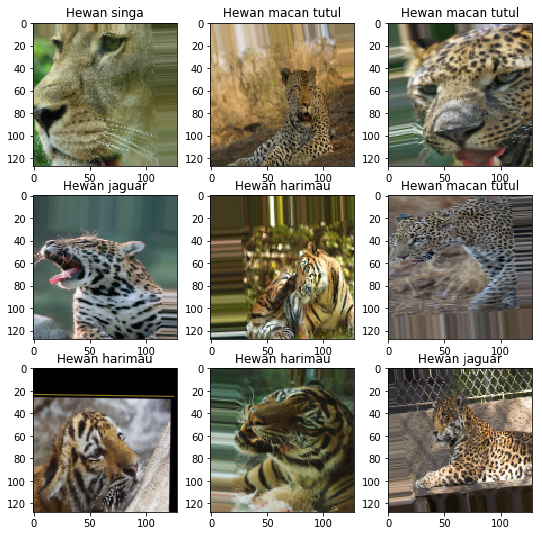

In [0]:
plt.figure(figsize=(9, 9))
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9): # Augmentasi menggunakan datagen.flow
	# create a grid of 3x3 images
  for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(cv2.cvtColor(X_batch[i], cv2.COLOR_BGR2RGB))
    plt.title("Hewan %s" % (CATEGORIES[y_batch[i]]))      
	# show the plot
  plt.show()
  break

In [0]:
# memeriksa data 
X_val[0]

array([[[0.36862746, 0.3882353 , 0.36862746],
        [0.3882353 , 0.40392157, 0.3882353 ],
        [0.4117647 , 0.42352942, 0.4117647 ],
        ...,
        [0.21960784, 0.23137255, 0.2       ],
        [0.21568628, 0.23137255, 0.1882353 ],
        [0.20392157, 0.20784314, 0.16862746]],

       [[0.35686275, 0.38431373, 0.36862746],
        [0.36862746, 0.3764706 , 0.3529412 ],
        [0.41960785, 0.4392157 , 0.4       ],
        ...,
        [0.25490198, 0.26666668, 0.20784314],
        [0.20784314, 0.21960784, 0.16470589],
        [0.16470589, 0.1882353 , 0.14509805]],

       [[0.3254902 , 0.34117648, 0.3372549 ],
        [0.34901962, 0.36862746, 0.34509805],
        [0.40784314, 0.43529412, 0.40784314],
        ...,
        [0.23137255, 0.24313726, 0.18039216],
        [0.19607843, 0.20392157, 0.15686275],
        [0.16470589, 0.1764706 , 0.14117648]],

       ...,

       [[0.30588236, 0.34509805, 0.3764706 ],
        [0.3882353 , 0.41960785, 0.4509804 ],
        [0.30980393, 0

## 2.9. One Hot Encoding

In [0]:
# class to_categorical kita butuhkan dari library keras
from keras.utils import np_utils

num_class = 4

y_train_ohe = np_utils.to_categorical(y_train, num_class)
y_val_ohe = np_utils.to_categorical(y_val, num_class)

Using TensorFlow backend.


In [0]:
print('Bentuk X_train sekarang : ', X_train.shape)
print('Bentuk y_train sekarang : ', np.array(y_train_ohe).shape)
print('Bentuk X_val sekarang   : ', X_val.shape)
print('Bentuk y_val sekarang   : ', np.array(y_val_ohe).shape)

Bentuk X_train sekarang :  (1994, 128, 128, 3)
Bentuk y_train sekarang :  (1994, 4)
Bentuk X_val sekarang   :  (499, 128, 128, 3)
Bentuk y_val sekarang   :  (499, 4)


In [0]:
#cetak isinya, sebelum dan sesudah
print('Label encoding:')
print(y_load_raw)

print('\nTrain One-hot encoding:')
print(y_train_ohe)
print('\nVal One-hot encoding:')
print(y_val_ohe)

Label encoding:
[3, 3, 1, 2, 1, 3, 3, 3, 1, 3, 2, 0, 1, 1, 3, 0, 0, 3, 2, 1, 0, 0, 0, 1, 1, 1, 0, 3, 2, 1, 2, 0, 2, 1, 3, 2, 1, 1, 1, 1, 3, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 3, 3, 0, 2, 2, 0, 3, 3, 1, 1, 2, 0, 2, 1, 1, 1, 3, 0, 1, 0, 3, 1, 2, 2, 2, 1, 2, 1, 2, 3, 0, 3, 2, 3, 3, 1, 2, 1, 2, 0, 3, 1, 2, 1, 3, 0, 1, 3, 2, 3, 0, 0, 3, 1, 2, 1, 3, 0, 2, 1, 2, 3, 1, 2, 2, 3, 2, 3, 1, 2, 0, 1, 2, 1, 1, 0, 2, 2, 3, 1, 2, 3, 0, 2, 0, 2, 0, 0, 3, 2, 3, 0, 0, 2, 0, 1, 2, 0, 3, 3, 3, 3, 0, 3, 1, 0, 3, 2, 3, 2, 2, 2, 3, 3, 3, 1, 0, 2, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 0, 1, 0, 3, 2, 1, 3, 2, 0, 2, 1, 2, 2, 1, 3, 0, 2, 0, 0, 3, 0, 3, 1, 0, 3, 3, 0, 0, 2, 2, 0, 0, 3, 2, 3, 0, 2, 2, 0, 0, 3, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 3, 1, 0, 2, 2, 3, 2, 2, 2, 2, 1, 2, 3, 0, 3, 0, 1, 2, 0, 1, 0, 2, 1, 3, 2, 2, 1, 2, 2, 2, 3, 0, 1, 1, 3, 3, 0, 1, 2, 0, 3, 1, 3, 3, 3, 0, 0, 0, 2, 2, 0, 3, 1, 2, 1, 1, 3, 0, 1, 3, 0, 1, 0, 1, 2, 0, 0, 1, 1, 3, 3, 1, 2, 2, 1, 3, 3, 0, 3, 2, 0, 0,

# 3. Convolutional Neural Network

In [0]:
# memeriksa bentuk gambar

X_load_raw.shape[1:]

(128, 128, 3)

https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d

https://victorzhou.com/blog/intro-to-cnns-part-1/

https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/

https://blog.paperspace.com/busting-the-myths-about-batch-normalization/

## 3.1. Membangun arsitektur CNN dengan keras

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# Conv 1
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same', name='block1_conv1', 
                 input_shape= X_load_raw.shape[1:]))
model.add(MaxPooling2D((2, 2),strides=(2, 2), padding='same', name='block1_pool'))
model.add(Dropout(0.2))

# Conv 2
model.add(Conv2D(128, (3, 3),  strides=(1, 1), activation='relu', padding='same', name='block2_conv1'))
model.add(MaxPooling2D((2, 2),strides=(2, 2), padding='same', name='block2_pool'))
model.add(Dropout(0.2))

# Conv 2
model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same', name='block3_conv1'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same',name='block3_pool'))
model.add(Dropout(0.2))

# Conv 2
model.add(Conv2D(512, (3, 3), strides=(1, 1), activation='relu', padding='same', name='block4_conv1'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same',name='block4_pool'))
model.add(Dropout(0.2))

# Conv 2
model.add(Conv2D(1024, (3, 3), strides=(1, 1), activation='relu', padding='same', name='block5_conv1'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same',name='block5_pool'))
model.add(Dropout(0.2))


# Flatten
model.add(Flatten(name='flatten'))
model.add(Dense(128, activation='relu', name = "fc_1"))
model.add(Dropout(0.5))
model.add(Dense(12, activation='relu',name = "fc_2"))
model.add(Dropout(0.5))
model.add(Dense(units = 4, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 32, 32, 256)      

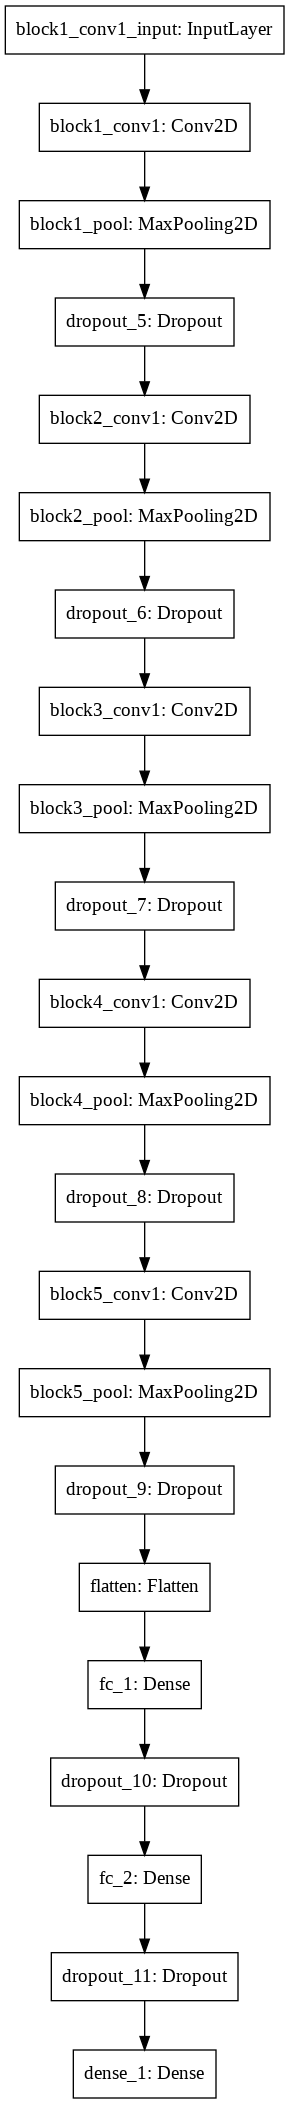

In [0]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='convolutional_neural_network.png')

## 3.2. Konfigurasi Kompilasi Optimizer Model CNN

In [0]:
from tensorflow.keras.optimizers import Adam

adam = Adam(lr=0.0001) 
model.compile(loss='categorical_crossentropy', #integer hot endcoding gunakan sparse_categorical_crossentropy
              optimizer=adam,
              metrics=['accuracy'])


In [0]:
print('Jumlah data train :', len(X_train))
print('Jumlah data validasi  :', len(X_val))

Jumlah data train : 1994
Jumlah data validasi  : 499


## 3.3. fitting model

https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

https://stackoverflow.com/questions/46705600/keras-fit-image-augmentations-to-training-data-using-flow-from-directory

https://keras.io/callbacks/

nanti baca ini  : https://www.programcreek.com/python/example/104420/keras.callbacks.TensorBoard

In [0]:
import time
from datetime import timedelta

start_time = time.time()

step = 1000

epochs = 5
#model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=64),
                    steps_per_epoch=step, 
                    epochs=epochs,
                    shuffle=True,
                    verbose = 1,         
                    validation_data=(X_val, y_val_ohe))

end_time = time.time()

print('Waktu training :{}'. format(timedelta(seconds=end_time-start_time)))




Epoch 1/5
1000/1000 [==============================] - 303s 303ms/step - loss: 0.1834 - acc: 0.8989 - val_loss: 0.3388 - val_acc: 0.9279
Epoch 2/5
1000/1000 [==============================] - 301s 301ms/step - loss: 0.1875 - acc: 0.8976 - val_loss: 0.2602 - val_acc: 0.9359
Epoch 3/5
1000/1000 [==============================] - 298s 298ms/step - loss: 0.1713 - acc: 0.9016 - val_loss: 0.5507 - val_acc: 0.8938
Epoch 4/5
1000/1000 [==============================] - 302s 302ms/step - loss: 0.1710 - acc: 0.9023 - val_loss: 0.4174 - val_acc: 0.9198
Epoch 5/5
1000/1000 [==============================] - 302s 302ms/step - loss: 0.1518 - acc: 0.9076 - val_loss: 0.6848 - val_acc: 0.9018
Waktu training :0:25:06.721381


https://machinelearningmastery.com/save-load-keras-deep-learning-models/


In [0]:
#Save model
model.save('drive/My Drive/Skripsi/select/model/Model_F2.h5')
model.save_weights('drive/My Drive/Skripsi/select/model/Model_weight_F2.h5')

# 4. Analisis hasil

## 4.2. Melakukan Visualisasi / Plotting Loss dan Accuracy

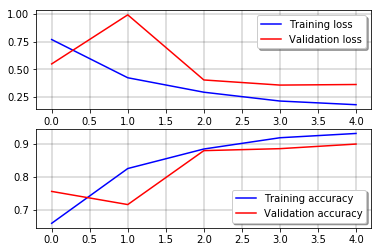

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#plot perbandingan training loss dan validation loss
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

#plot perbandingan training acc dan validation acc
ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

## 4.3. Melakukan Visualisasi / Plotting Confusion Matrix

In [0]:
#beberapa class dan libraries yang dibutuhkan untuk plotting confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

#berikut merupakan fungsi untuk plotting confusion matrix
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
#mari kita prediksi seluruh gambar dalam data validasi kita
ypred_onehot = model.predict(X_val)
print(ypred_onehot)

[[9.96195436e-01 1.49679527e-05 3.78963072e-03 3.55244393e-12]
 [9.99938607e-01 4.69249306e-09 2.39130786e-05 3.74639167e-05]
 [9.99991298e-01 8.72837154e-06 1.16119295e-10 5.28118572e-27]
 ...
 [9.99997258e-01 2.74084027e-06 4.80789497e-09 1.76275198e-23]
 [3.50051408e-07 9.43562031e-01 5.64373061e-02 3.03860304e-07]
 [2.38270950e-05 9.27990751e-09 2.52810987e-05 9.99950886e-01]]


In [0]:
#hasil prediksi masih one-hot encoded, untuk memudahkan kita memahaminya, kita kembalikan lagi menjadi label
#dari [0.01, 0.02, 0.75, 0.01, 0.03, 0.1, 0.02, 0.01, 0.03, 0.02] --> 2 (kita lihat yang memiliki probabilitas tertinggi)
ypred = np.argmax(ypred_onehot,axis=1)
print(ypred)

[0 0 0 0 3 2 1 3 2 2 3 0 3 0 2 2 2 0 3 1 3 0 0 2 0 1 0 0 2 3 3 0 2 0 3 1 2
 1 1 0 1 2 1 0 1 2 1 0 2 0 2 1 0 0 0 1 1 2 1 0 3 2 0 2 0 0 3 3 0 0 2 1 0 2
 2 2 2 1 1 3 2 2 1 3 1 1 3 1 0 2 3 0 2 1 3 2 2 2 1 0 0 0 3 0 2 1 1 0 3 1 0
 3 3 1 1 3 3 1 1 3 1 3 2 0 3 3 1 2 2 2 2 1 2 0 0 2 1 3 2 2 1 3 1 1 3 3 3 2
 3 0 0 0 1 3 0 0 2 2 0 0 3 1 1 0 1 1 2 3 2 3 2 2 1 2 1 2 0 0 2 3 2 1 2 3 3
 2 0 3 0 0 2 1 0 2 2 2 0 0 1 1 2 2 3 3 1 1 1 2 3 0 0 2 2 2 3 2 2 3 1 2 2 0
 0 2 1 3 3 1 0 3 1 0 3 3 3 0 1 1 2 0 3 1 0 2 0 0 3 2 3 0 1 2 1 0 2 3 3 0 1
 0 2 3 0 1 1 2 2 2 3 2 1 1 1 3 3 0 1 2 1 0 2 1 2 3 0 1 3 2 2 0 2 3 1 3 3 3
 1 0 0 2 2 1 1 0 3 1 2 2 2 2 3 1 3 1 2 1 3 3 1 2 3 3 1 0 2 3 2 1 3 0 2 0 3
 1 3 0 1 2 2 3 3 0 1 0 1 1 3 2 2 2 1 0 2 0 0 1 3 1 1 1 2 1 1 3 2 1 3 3 3 3
 1 0 0 0 2 0 1 2 3 3 1 1 2 2 1 2 2 0 2 2 1 2 1 3 1 3 1 0 2 3 1 3 0 2 1 2 3
 2 3 0 0 3 2 2 2 1 1 3 1 3 3 3 1 1 1 0 3 1 2 3 2 3 3 0 1 1 3 1 1 0 0 3 1 0
 2 0 0 0 3 3 0 0 2 3 2 2 3 3 1 1 0 3 3 3 1 0 3 0 1 3 2 3 2 0 1 2 1 1 2 3 1
 1 0 0 0 0 2 0 1 2 0 1 0 

In [0]:
#sekarang kita mau membandingkan prediksi kita (ypred) dengan class yang sebenarnya,
#namun class yang sebenarnya (yang disimpan dalam variable yval) juga masih one-hot encoded, kita kembalikan juga jadi label
#dari [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] --> 2
ytrue = np.argmax(y_val_ohe,axis=1)
print(ytrue)

[0 0 0 0 3 2 1 3 2 1 3 0 3 0 2 2 2 0 3 0 3 0 0 1 0 1 0 0 2 3 3 0 3 0 3 1 2
 1 1 0 1 0 1 0 0 2 1 0 2 0 2 1 0 0 0 1 1 2 1 0 3 2 0 2 0 0 3 3 0 0 2 1 0 2
 1 2 2 1 1 3 3 3 1 3 1 1 3 1 0 2 3 0 2 1 3 2 2 2 1 0 0 0 3 0 2 1 1 0 3 1 0
 3 3 1 1 3 3 1 1 3 1 3 2 0 3 3 0 2 2 2 3 1 2 0 0 2 1 3 2 2 2 3 1 1 3 3 3 2
 3 0 0 0 2 3 0 0 3 2 0 0 3 1 1 0 1 1 2 3 2 3 1 1 1 2 2 2 0 0 2 3 2 1 2 3 3
 2 0 3 0 0 2 1 0 2 2 2 0 0 1 1 2 2 3 3 1 1 2 2 3 0 0 2 2 2 3 3 2 3 1 2 2 0
 0 2 1 3 3 1 0 3 1 0 3 3 3 0 1 1 2 0 3 1 0 3 0 0 3 2 3 0 2 2 1 0 1 3 3 0 1
 0 2 3 0 1 1 2 2 2 3 0 1 1 1 3 3 0 1 2 1 0 2 1 2 3 0 1 3 3 1 0 2 3 1 3 3 3
 1 0 0 1 3 1 1 0 3 1 2 2 2 2 3 1 3 1 2 0 3 3 1 2 3 3 1 2 2 3 2 1 3 0 2 0 3
 1 3 0 1 2 2 3 3 0 1 0 2 1 3 2 2 2 1 0 2 0 0 1 3 1 1 1 2 1 1 3 2 1 3 3 3 3
 1 0 0 0 2 3 1 3 3 3 1 1 3 1 1 2 2 0 0 2 1 2 1 3 1 3 2 0 2 3 1 3 0 2 1 2 3
 2 3 0 0 3 1 2 2 1 1 3 1 3 3 3 1 1 1 0 0 1 2 3 2 3 3 0 1 1 3 1 1 0 0 3 1 3
 2 0 2 0 3 3 0 3 2 3 2 1 3 3 0 1 0 3 3 3 1 0 3 0 1 3 2 3 2 0 1 2 1 1 3 3 1
 1 0 0 0 0 3 0 1 2 0 1 0 

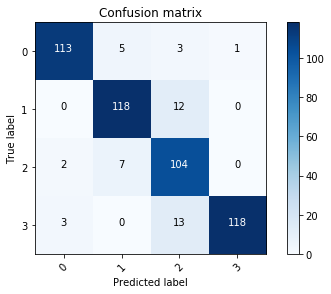

In [0]:
#sekarang karena prediksi kita (ypred) dan class yang sebenarnya (ytrue) sudah dalam bentuk label,
#saatnya kita masukkan kedalam confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)

#untuk memahami hasil confusion matrix, kita plot hasilnya dengan fungsi yang sudah kita definisikan sebelumnya
plot_confusion_matrix(confusion_mtx, classes=range(num_class))

## 4.4. Laporan Klasifikasi

In [0]:
#import class classification_report dari library sklearn
from sklearn.metrics import classification_report

#cetak laporannya
print(classification_report(ytrue, ypred))

NameError: ignored

In [0]:
loss,acc = model.evaluate(X_train, y_train_ohe)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

1994/1994 [==============================] - 1s 430us/sample - loss: 0.0730 - acc: 0.9739
Restored model, accuracy: 97.39%


## 4.5. Melakukan Visualisasi / Plotting Error

In [0]:
# yang mana aja sih yang error?
# --- kalo semua prediksinya tepat, ypred - ytrue pasti semuanya nol nilainya
# --- kalo ada yang ga tepat prediksinya (error), berarti ypred - ytrue ada yang enggak nol nilainya
errors = (ypred - ytrue != 0)

ypred_onehot_error = ypred_onehot[errors] # yang error emang prediksi nya apa sih?
ypred_labels_error = ypred[errors]        #    - label encoding
ytrue_onehot_error = y_val_ohe[errors]         # yang error jawaban sebenernya apa sih?
ytrue_labels_error = ytrue[errors]        #    - label encoding
X_val_error        = X_val[errors]         # yang error gambarnya apa sih?

In [0]:
# setiap baris prediksi dari kumpulan prediksi yang salah,
# nilai probabilitas angka-prediksi tersebut terpilih oleh CNN berapa sih?
# --- dari kandidat-kandidat output sebuah gambar, ambil probabilitas yang tertinggi
# --- lakuin ini untuk seluruh prediksi gambar yang ada
ypred_error_probability = np.max(ypred_onehot_error, axis=1)

In [0]:
# setiap baris prediksi dari kumpulan prediksi yang salah,
# nilai probabilitas angka-sebenarnya yang harusnya dipilih oleh CNN berapa sih?
# --- perkalian matrix ypred_onehot_error dan ytrue_onehot_error akan menyisakan nilai probabilitas angka-sebenarnya yang harusnya dipilih
# --- untuk ngambil nilai tersebut, berhubung nilai yang lain 0 semua, maka di sum saja ke kanan (nilainya ga bakal pengaruh)
ytrue_error_probability = np.sum( (ypred_onehot_error*ytrue_onehot_error), axis=1 )

In [0]:
# kita punya nilai probabilitas angka-prediksi yg terpilih oleh CNN,
# kita punya nilai probabilitas angka-sebenarnya yg harusnya dipilih CNN
# --- semakin jauh perbedaan kedua nilai tersebut, CNN sangat terkecoh oleh gambar tersebut
# --- itu berarti, mungkin saja gambarnya yang mencurigakan (yang nulis angkaya ngaco)
delta_YpredYtrue_errorProbability = ypred_error_probability - ytrue_error_probability

In [0]:
# sekarang kita sort, mana sih yang paling mencurigakan,
# pas ngesort, harus disimpen urutannya (indexnya),
# supaya nanti bisa ditampilin gambar dengan index yang bersangkutan,
# --- pake np.argsort, dia ngembaliin index-index yang yang punya isi nilai terkecil sampe terbesar
# --- yang paling mencurigakan = yang paling gede nilainya = yang terbawah
sorted_delta_index = np.argsort(delta_YpredYtrue_errorProbability)

# kita ambil 6 yang paling mencurigakan
top_n_error = 6
most_ridiculous_error = sorted_delta_index[-top_n_error:]

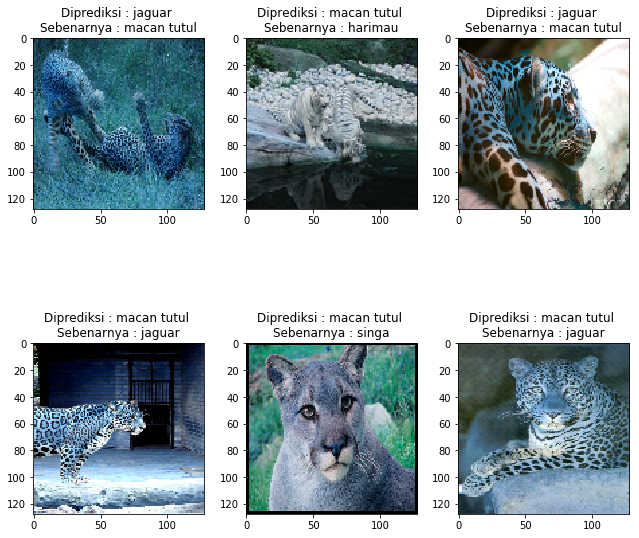

In [0]:
plt.figure(figsize=(9, 9))

#tampilkan yang prediksi yang paling ngaco mencurigakan itu
for i in range (0, top_n_error):
    image = X_val_error[most_ridiculous_error[i]]
    
    plt.subplot(2, 3, i+1)
    plt.imshow(image, cmap="gray")
    plt.title("Diprediksi : %s \nSebenarnya : %s" % (CATEGORIES[ypred_labels_error[most_ridiculous_error[i]]], 
                                                     CATEGORIES[ytrue_labels_error[most_ridiculous_error[i]]]));
plt.tight_layout()

# 5. Prediksi Data Test dan Penyimpanan

In [0]:
# Untuk mount google drive.
from google.colab import drive

drive.mount('/content/drive')

#Load model
from tensorflow.keras.models import load_model

# returns a compiled model
# identical to the previous one
model = load_model('drive/My Drive/Skripsi/select/model/Model_F2.h5')
model.load_weights('drive/My Drive/Skripsi/select/model/Model_weight_F2.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Memuat data 
import pickle

pickle_in = open("/content/drive/My Drive/Skripsi/dataset_500x4/X_500x4_rgb.pickle","rb")
test_X_load_raw = pickle.load(pickle_in)

pickle_in = open("/content/drive/My Drive/Skripsi/dataset_500x4/y_500x4_rgb.pickle","rb")
test_y_load_raw = pickle.load(pickle_in)

In [0]:
X_test, y_test =(test_X_load_raw, test_y_load_raw)


In [0]:
num_test = len(y_test)
num_test

1988

In [0]:
# sekarang, model CNN yang kita buat, kita suruh untuk memprediksi data testing.
predictions = model.predict_classes((X_test, y_test), verbose=1)

1988/1988 [==============================] - 3s 2ms/sample


In [0]:
# cetak informasi variable prediksi
print('Tipe data predictions : ', type(predictions))
print('Isi data predictions  : ', predictions)

Tipe data predictions :  <class 'numpy.ndarray'>
Isi data predictions  :  [2 1 1 ... 0 1 2]


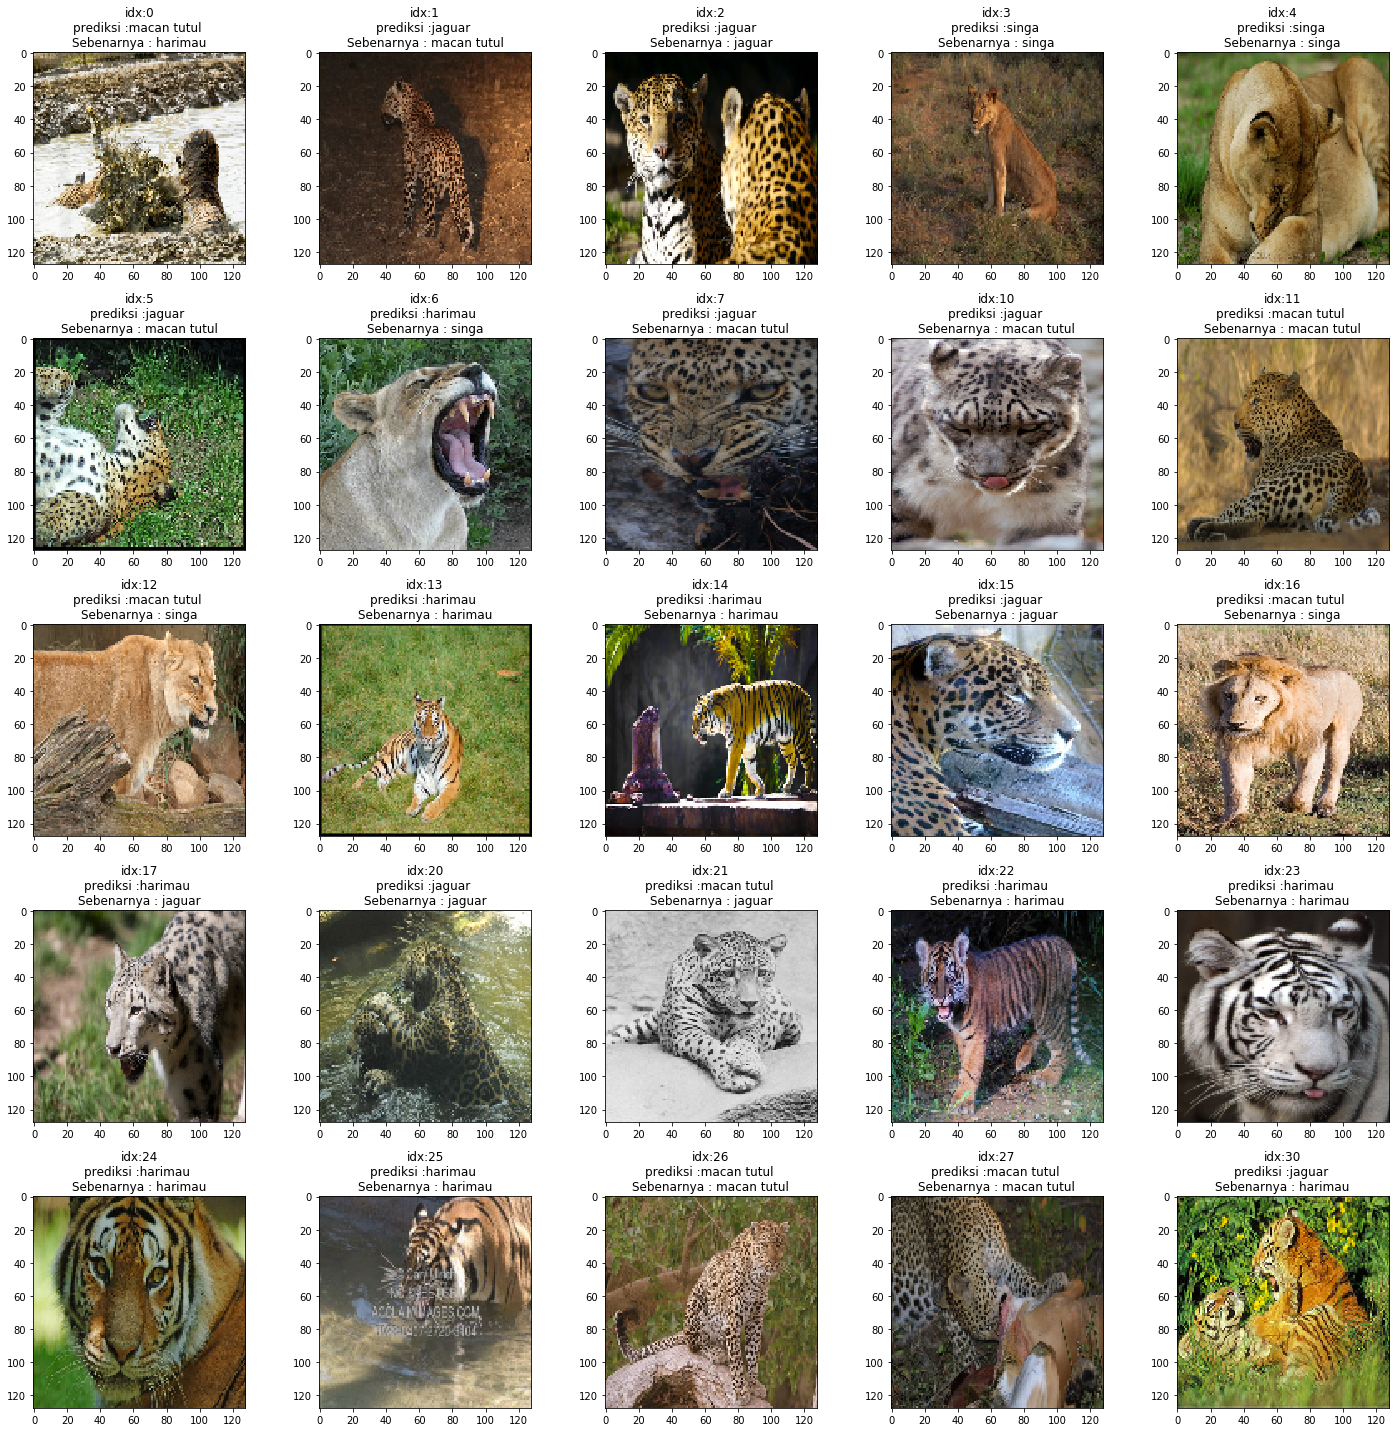

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# berapa banyak gambar yang mau ditampilkan
number_image_shown = 30

# generate nilai secara acak, nantinya kita gunakan sebagai indeks untuk pengambilan gambar
# random_image_index = np.random.choice(num_test, number_image_shown, replace=False)

CATEGORIES = {0:'harimau', 1:'jaguar', 2:'macan tutul', 3:'singa'}


# berapa banyak gambar pada sisi koleksi subplot kita
subplot_sides = int(np.sqrt(number_image_shown))

# nilai awal indeks, nantinya kita gunakan untuk mengambil nilai acak dalam random_image_index satu-persatu
idx = 0

# buat subplot (subplot_sides x subplot_sides)
f, plots = plt.subplots(subplot_sides, subplot_sides, figsize=(20,20))

# loop untuk setiap subplot yang ada
for i in range (0, subplot_sides):
    for j in range (0, subplot_sides):
        
        # ambil data gambar secara acak, sekaligus reshape menjadi gambar berukuran (28,28)
        image = X_test[idx]
     
        # tampilkan gambar dalam subplot
        plots[i,j].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR)) 
        # tampilkan judul subplot
        plots[i,j].set_title("idx:%o\nprediksi :%s \nSebenarnya : %s" % 
                             (idx, 
                              CATEGORIES[predictions[idx]],
                              CATEGORIES[y_test[idx]] ))
        # indeks berikutnya
        idx = idx+1

# supaya gambarnya tidak mepet2
plt.tight_layout()

In [0]:
#beberapa class dan libraries yang dibutuhkan untuk plotting confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

#berikut merupakan fungsi untuk plotting confusion matrix
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
# class to_categorical kita butuhkan dari library keras
from keras.utils import np_utils

num_class = 4

y_test_ohe = np_utils.to_categorical(y_test, num_class)

In [0]:
#mari kita prediksi seluruh gambar dalam data validasi kita
ypred_onehot = model.predict(X_test)
print(ypred_onehot)

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [0]:
#hasil prediksi masih one-hot encoded, untuk memudahkan kita memahaminya, kita kembalikan lagi menjadi label
#dari [0.01, 0.02, 0.75, 0.01, 0.03, 0.1, 0.02, 0.01, 0.03, 0.02] --> 2 (kita lihat yang memiliki probabilitas tertinggi)
ypred = np.argmax(ypred_onehot,axis=1)
print(ypred)

[2 1 1 ... 0 1 2]


In [0]:
#sekarang kita mau membandingkan prediksi kita (ypred) dengan class yang sebenarnya,
#namun class yang sebenarnya (yang disimpan dalam variable yval) juga masih one-hot encoded, kita kembalikan juga jadi label
#dari [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] --> 2
ytrue = np.argmax(y_test_ohe,axis=1)
print(ytrue)

[0 2 1 ... 3 1 2]


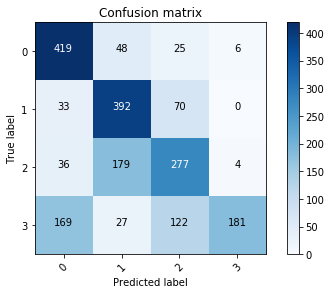

In [0]:
#sekarang karena prediksi kita (ypred) dan class yang sebenarnya (ytrue) sudah dalam bentuk label,
#saatnya kita masukkan kedalam confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)

#untuk memahami hasil confusion matrix, kita plot hasilnya dengan fungsi yang sudah kita definisikan sebelumnya
plot_confusion_matrix(confusion_mtx, classes=range(num_class))

In [0]:
#import class classification_report dari library sklearn
from sklearn.metrics import classification_report

#cetak laporannya
print(classification_report(ytrue, ypred))

              precision    recall  f1-score   support

           0       0.64      0.84      0.73       498
           1       0.61      0.79      0.69       495
           2       0.56      0.56      0.56       496
           3       0.95      0.36      0.52       499

    accuracy                           0.64      1988
   macro avg       0.69      0.64      0.62      1988
weighted avg       0.69      0.64      0.62      1988

